**Hi** folks,

Today I am working on **Multiple linear regression** which is same like our **Simple linear regression**,but the only difference is....in Simple linear regression we work only with one dependent and one independent variable,but in **Multiple linear regression** we can work more than one dependent variable and independent variable. 
Apart from this we follow same steps as simple linear regression.




# It looks something like this!! #

![](http://i0.wp.com/brokerstir.com/wp-content/uploads/2018/04/multiple_linear2.png)

# About this Dataset #

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

It's a great dataset for evaluating Multiple regression models.


# Goal:-#
   To predict whether a particular startup would be safe to **invest in or not**.






# Step 1 #---Data preprocessing


In [55]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [56]:
dataset = pd.read_csv("../input/50_Startups.csv")

In [57]:
#Lets check the dataset!
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Dataset contain 5 columns--"**R&D Spend**","**Administration**","**Marketing Spend**","**State**","**Profit**".

**1.R&D Spend**
             Research and development – R&D – is the process by which a company works to obtain new knowledge that it might use to create new technology, products, services, or systems that it will either use or sell. So,this column tells you how much you spend on R&D.
             
**2.Administration**
              It is the process of arrangements and tasks needed to control the operation of a plan or organization.
              
**3.Marketing Spend**
              refers to activities undertaken by a company to promote the buying or selling of a product or service. Marketing includes advertising, selling, and delivering products to consumers or other businesses.
   
**4.State** 
          This column contain three states which is Califonia,Newyork and Floida.
   
**5.Profit**  
              Profit is a financial benefit that is realized when the amount of revenue gained from a business activity exceeds the expenses, costs, and taxes needed to sustain the activity.

In [58]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

From the above we can say that there is no null values present! 

In [59]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Lets Analyse the relationship between Dependent variable with other independent variable...


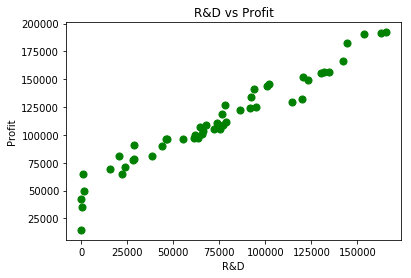

In [60]:
#Plot R&D vs Profit............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

From the above plot we can able to visualize that R&D and Profit has positive correlation.

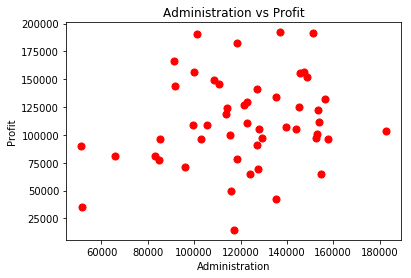

In [61]:
#Plot Administration vs Profit
x1 = dataset.iloc[:, 1].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()

From above plot - Zero correlation between Administration and Profit.

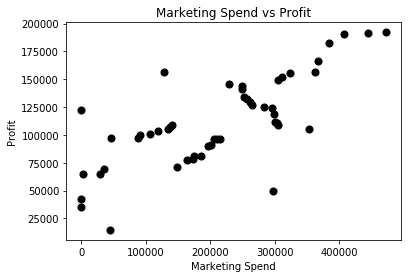

In [62]:
#Plot Marketing Spend vs Profit
x1 = dataset.iloc[:, 2].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Black',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()

From above plot -High correlation between Marketing Spend and Profit.

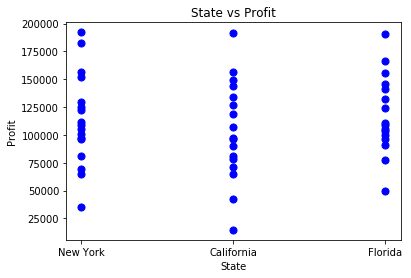

In [63]:
#Plot State vs Profit
x1 = dataset.iloc[:, 3].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Blue',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()

**Separating dependent and independent variables..**

In [64]:
X = dataset.iloc[:, :-1].values
print(X)


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [65]:
y = dataset.iloc[:, 4].values
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


  As **state column** has a categorical variable. So,convert categorical variable to numerical using LabelEncode and OneHotEncode.

In [66]:

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [67]:

# Avoiding the Dummy Variable Trap
X = X[:, 1:]


In [68]:
print(X)

[[0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05 4.7178410e+05]
 [0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05 4.4389853e+05]
 [1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05 4.0793454e+05]
 [0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05 3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04 3.6616842e+05]
 [0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04 3.6286136e+05]
 [0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05 1.2771682e+05]
 [1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05]
 [0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05 3.1161329e+05]
 [0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05 3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05 2.2916095e+05]
 [0.0000000e+00 0.0000000e+00 1.0067196e+05 9.1790610e+04 2.4974455e+05]
 [1.0000000e+00 0.0000000e+00 9.3863750e+04 1.2732038e+05 2.4983944e+05]
 [0.0000000e+00 0.0000000e+00 9.1992390e+04 1.35495

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Step 2:-#--Building a model 


In [70]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:

# Predicting the Test set results
y_pred = regressor.predict(X_test)

**Evaluate the result:-**

In [72]:
import statsmodels.formula.api as sm
X
X_opt = X[:,[0,1,2,3,4]]
X_opt
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     727.1
Date:                Thu, 30 May 2019   Prob (F-statistic):           7.87e-42
Time:                        11:54:08   Log-Likelihood:                -545.15
No. Observations:                  50   AIC:                             1100.
Df Residuals:                      45   BIC:                             1110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3464.4536   4905.406      0.706      0.484   -6415.541    1.33e+04
x2          5067.8937   4668.238      1.086      0.283   -4334.419    1.45e+04
x3             0.7182      0.066     10.916      0.000       0.586       0.851
x4             0.3113      0.035      8.885      0.000       0.241       0.382
x5             0.0786      0.023      3.429      0.001       0.032       0.125
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.241
Skew:                          -0.237   Prob(JB):                        0.538
Kurtosis:                       2.391   Cond. No.                     8.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""